# Welcome to `carefree-creator`!

# Setup

## 1.0

In [1]:
!nvidia-smi

Tue Sep 13 12:18:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.1 Change Python version

In [2]:
!sudo apt-get update -y
!sudo apt-get install python3.8

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2

!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!python --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,965 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.l

## 1.2 Install Dependencies

In [3]:
!rm -rf carefree-*
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!git clone https://github.com/carefree0910/carefree-learn.git
!git clone https://github.com/carefree0910/carefree-creator.git
!cd carefree-learn; pip3 install -e .[cv]
!cd carefree-creator; pip3 install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 85.5 MB/s eta 0:00:01tcmalloc: large alloc 1837744128 bytes == 0x2ee2000 @  0x7f1025f791e7 0x4d3d40 0x4d3dcc 0x5d6bfc 0x51ef51 0x51f0db 0x4f768c 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x5d84f8 0x49d2ae 0x55eea0 0x5d85d1 0x49d74c 0x55eea0 0x5d85d1 0x49d2ae
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 85.7 MB/s eta 0:00:01tcmalloc: large alloc 2297184256 bytes == 0x7077e000 @  0x7f1025f7a615 0x5d6bfc 0x51ef51 0x51f0db 0x4f768c 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x5d84f8 0x49d2ae 0x55eea0 0x5d85d1 0x49d74c 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1
tcmalloc: large alloc 18

## 1.3 Download Pretrained Models

In [4]:
!python -c "import cflearn; cflearn.cv.DiffusionAPI.from_sd(); cflearn.cv.DiffusionAPI.from_inpainting()"

clip.large: 1.71GB [06:55, 4.12MB/s]                
clip_3.8: 2.11MB [00:01, 1.95MB/s]                
kl.f8: 405MB [01:23, 4.85MB/s]               
ldm.sd: 4.27GB [00:47, 89.5MB/s]                
ldm_inpainting: 1.76GB [05:08, 5.71MB/s]                


# Launch the Server

## Use `nohup` to run the server in the background

In [5]:
!mv /usr/local/bin/uvicorn /usr/local/bin/uvicorn38
!nohup uvicorn38 apis.interface:app --host 0.0.0.0 --port 8123 >& server.log &

## Test the server

Here, we should wait until this command returns {"msg":"Hello, carefree0910!"}. There are two handy ways to check whether the server is ready or not:
- You can open the resource monitor and look at the `GPU RAM` panel. When it goes up, the server is about to be ready.
- Another way to confirm is to check the generated `server.log` file. The server will be ready once it shows `Uvicorn running on http://0.0.0.0:8123`.

In [7]:
!curl -X POST -H "Content-Type: application/json" -d '{"name": "carefree0910"}' http://localhost:8123/demo/hello

{"msg":"Hello, carefree0910!"}

After the server is launched successfully, we can already call the APIs directly. For example, let's try out the `txt2img` API:

In [21]:
!curl -X POST -H "Content-Type: application/json" -d '{"text": "A fantasy landscape."}' http://localhost:8123/txt2img/sd -o test.out

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  408k  100  408k  100    32  28103      2  0:00:16  0:00:14  0:00:02 89602


The above request will send `A fantasy landscape.` prompt to the `img2txt` service, and the response (which contains some bytes of the generated image) will be saved to the `test.out` file. We can check it out with a few lines of code:

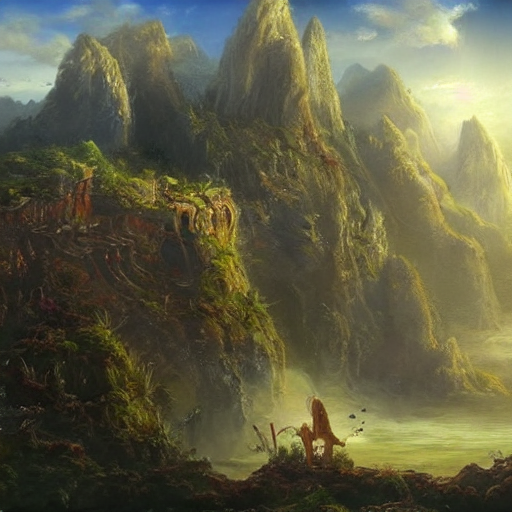

In [22]:
import io
from PIL import Image

with open("test.out", "rb") as f:
  image = Image.open(io.BytesIO(f.read()))

image

In fact, we can already play with `carefree-creator` in this way, and thanks to Google Colab, it is pretty visualizable!

We can try some more 'advanced' prompts:

In [23]:
!curl -X POST -H "Content-Type: application/json" -d '{"text": "A fantasy landscape, highly detailed, high resolution, artstation."}' http://localhost:8123/txt2img/sd -o test.out

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  456k  100  456k  100    78  31365      5  0:00:15  0:00:14  0:00:01  124k


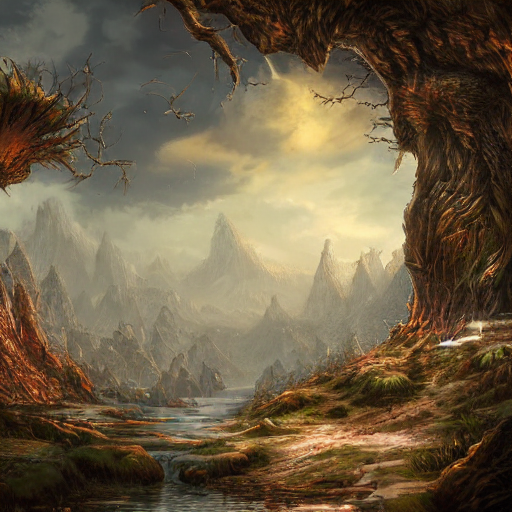

In [24]:
with open("test.out", "rb") as f:
  image = Image.open(io.BytesIO(f.read()))

image

# Launch Gradio

## Install dependency

In [6]:
!/usr/bin/python3.7 -m pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 17.6 MB/s 
     |████████████████████████████████| 270 kB 64.2 MB/s 
     |████████████████████████████████| 212 kB 57.3 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 112 kB 17.9 MB/s 
     |████████████████████████████████| 2.3 MB 59.6 MB/s 
  Using cached fastapi-0.83.0-py3-none-any.whl (55 kB)
  Using cached python-multipart-0.0.5.tar.gz (32 kB)
  Using cached uvicorn-0.18.3-py3-none-any.whl (57 kB)
  Using cached starlette-0.19.1-py3-none-any.whl (63 kB)
  Using cached anyio-3.6.1-py3-none-any.whl (80 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     

## Helper Functions

In [7]:
import os
import json

from typing import Any
from typing import Dict

def post(
  uri: str,
  data: Dict[str, Any],
  out_path: str,
) -> None:
  d = json.dumps(data)
  os.system(f"""curl -X POST -H "Content-Type: application/json" -d '{d}' http://localhost:8123{uri} -o {out_path}""")

## Create Gradio Apps

### Text to Image

In [8]:
import io
import tempfile

import gradio as gr

from PIL import Image

def txt2img(prompt: str) -> Image:
  with tempfile.NamedTemporaryFile() as tmp_file:
    post("/txt2img/sd", {"text": prompt}, tmp_file.name)
    image = Image.open(io.BytesIO(tmp_file.read()))
  return image

demo = gr.Interface(fn=txt2img, inputs="text", outputs="image")
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://20850.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7ff1716a90d0>,
 'http://127.0.0.1:7860/',
 'https://20850.gradio.app')

### Inpainting